In [1]:
from keras.layers import Dense, Conv2D, BatchNormalization, Activation,MaxPooling2D
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
from keras.layers import Input

from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from keras.optimizers import *
from keras.models import Model,Sequential
from keras.layers import *
from keras.activations import *
from keras.callbacks import *
import numpy as np
import pandas as pd 
from numpy import zeros, newaxis
import cv2 
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3

In [2]:
metaData = pd.read_csv("./Chest_xray_Corona_Metadata.csv")
metaData

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [3]:
normalMetaData=metaData.loc[metaData['Label'] == 'Normal']
normalMetaData

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5515,5538,NORMAL2-IM-0341-0001.jpeg,Normal,TEST,NaN,NaN
5516,5539,NORMAL2-IM-0340-0001.jpeg,Normal,TEST,NaN,NaN
5517,5540,NORMAL2-IM-0339-0001.jpeg,Normal,TEST,NaN,NaN
5518,5541,NORMAL2-IM-0338-0001.jpeg,Normal,TEST,NaN,NaN


In [4]:
PnemoniaMetaData=metaData.loc[metaData['Label'] == 'Pnemonia']
PnemoniaMetaData

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1341,1341,person101_virus_188.jpeg,Pnemonia,TRAIN,NaN,Virus
1342,1342,person101_virus_187.jpeg,Pnemonia,TRAIN,NaN,Virus
1343,1343,person1019_virus_1708.jpeg,Pnemonia,TRAIN,NaN,Virus
1344,1344,person1019_virus_1707.jpeg,Pnemonia,TRAIN,NaN,Virus
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
VirusPnemoniaMetaData=PnemoniaMetaData.loc[PnemoniaMetaData['Label_2_Virus_category'] == 'COVID-19']
VirusPnemoniaMetaData

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5221,5221,kjr-21-e25-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5222,5225,kjr-21-e24-g003-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5223,5228,kjr-21-e24-g002-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5224,5231,kjr-21-e24-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5225,5234,jkms-35-e79-g001-l-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5226,5235,jkms-35-e79-g001-l-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5227,5236,jkms-35-e79-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5228,5237,gr1_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5229,5238,gr1_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5230,5239,all14238-fig-0001-m-b.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [6]:
BacteriaPnemoniaMetaData=PnemoniaMetaData.loc[PnemoniaMetaData['Label_1_Virus_category'] == 'bacteria']
BacteriaPnemoniaMetaData

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
1347,1347,person1018_bacteria_2949.jpeg,Pnemonia,TRAIN,NaN,bacteria
1348,1348,person1017_bacteria_2948.jpeg,Pnemonia,TRAIN,NaN,bacteria
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,NaN,bacteria
1353,1353,person1014_bacteria_2945.jpeg,Pnemonia,TRAIN,NaN,bacteria
...,...,...,...,...,...,...
5859,5882,person173_bacteria_830.jpeg,Pnemonia,TEST,NaN,bacteria
5860,5883,person173_bacteria_829.jpeg,Pnemonia,TEST,NaN,bacteria
5861,5884,person172_bacteria_828.jpeg,Pnemonia,TEST,NaN,bacteria
5862,5885,person172_bacteria_827.jpeg,Pnemonia,TEST,NaN,bacteria


In [7]:
normalMetaDataTrain=normalMetaData.loc[normalMetaData['Dataset_type'] == 'TRAIN']
normalMetaDataTrain

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
1337,1337,NORMAL2-IM-1334-0001.jpeg,Normal,TRAIN,NaN,NaN
1338,1338,NORMAL2-IM-1333-0001.jpeg,Normal,TRAIN,NaN,NaN
1339,1339,NORMAL2-IM-1332-0001.jpeg,Normal,TRAIN,NaN,NaN
1340,1340,NORMAL2-IM-1330-0001.jpeg,Normal,TRAIN,NaN,NaN


In [8]:
normalMetaDataTest=normalMetaData.loc[normalMetaData['Dataset_type'] == 'TEST']
normalMetaDataTest

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,NaN,NaN
5287,5310,IM-0019-0001.jpeg,Normal,TEST,NaN,NaN
5288,5311,IM-0017-0001.jpeg,Normal,TEST,NaN,NaN
5289,5312,IM-0016-0001.jpeg,Normal,TEST,NaN,NaN
5290,5313,IM-0015-0001.jpeg,Normal,TEST,NaN,NaN
...,...,...,...,...,...,...
5515,5538,NORMAL2-IM-0341-0001.jpeg,Normal,TEST,NaN,NaN
5516,5539,NORMAL2-IM-0340-0001.jpeg,Normal,TEST,NaN,NaN
5517,5540,NORMAL2-IM-0339-0001.jpeg,Normal,TEST,NaN,NaN
5518,5541,NORMAL2-IM-0338-0001.jpeg,Normal,TEST,NaN,NaN


In [9]:
PnemoniaMetaDataTrain=PnemoniaMetaData.loc[PnemoniaMetaData['Dataset_type'] == 'TRAIN']
PnemoniaMetaDataTrain

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1341,1341,person101_virus_188.jpeg,Pnemonia,TRAIN,NaN,Virus
1342,1342,person101_virus_187.jpeg,Pnemonia,TRAIN,NaN,Virus
1343,1343,person1019_virus_1708.jpeg,Pnemonia,TRAIN,NaN,Virus
1344,1344,person1019_virus_1707.jpeg,Pnemonia,TRAIN,NaN,Virus
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
...,...,...,...,...,...,...
5281,5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5284,5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [10]:
PnemoniaMetaDataTest=PnemoniaMetaData.loc[PnemoniaMetaData['Dataset_type'] == 'TEST']

PnemoniaMetaDataTest

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5520,5543,person1631_virus_2826.jpeg,Pnemonia,TEST,NaN,Virus
5521,5544,person1629_virus_2823.jpeg,Pnemonia,TEST,NaN,Virus
5522,5545,person1628_virus_2822.jpeg,Pnemonia,TEST,NaN,Virus
5523,5546,person1628_virus_2821.jpeg,Pnemonia,TEST,NaN,Virus
5524,5547,person1627_virus_2819.jpeg,Pnemonia,TEST,NaN,Virus
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [11]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.5))          # this scale of zoom in image ratio of 30%
  image = zoom.augment_image(image)
  return image

def pan(image):                              # image shifted over x-y axis helps to highlights region 
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})        # 10% to left or right and same ratio to up-down
  image = pan.augment_image(image)
  return image

def brightness(image):                       # change brightness by multiplying pixels as mask
    brightness = iaa.Multiply((0.7, 1.7))    # 0.2-1.2 is limits of multipler 
    image = brightness.augment_image(image)  # note : if value is less than 1, means darker image
    return image
def flip(image):                             # flipping only about x_axis
    image = cv2.flip(image,1)               
    return image

def random_augment(image):
    if np.random.rand() < 0.1:
        image = pan(image)
    if np.random.rand() < 0.6:
        image = zoom(image)
    if np.random.rand() < 0.6:
        image = brightness(image)
  # if np.random.rand() < 0.1:
    #   image = flip(image)
    
    return image

In [12]:
X_Test_level1 = []
Y_Test_level1= []

X_val_level1 = []
Y_val_level1= []

for i in range (0,390):
    path='./Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/'+ str(PnemoniaMetaDataTest.iloc[i]['X_ray_image_name'])
    reshapedimage =cv2.resize(cv2.imread(path, 1), (224,224))
    if i %2 :
        X_Test_level1.append(reshapedimage)
        Y_Test_level1.append(1.0)
    else :
        X_val_level1.append(reshapedimage)
        Y_val_level1.append(1.0)

In [13]:
for i in range (0,234):
    path='./Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/'+ str(normalMetaDataTest.iloc[i]['X_ray_image_name'])
    reshapedimage =cv2.resize(cv2.imread(path, 1), (224,224))
    
    if i %2 :
        X_Test_level1.append(reshapedimage)
        Y_Test_level1.append(0.0)
    else :
        X_val_level1.append(reshapedimage)
        Y_val_level1.append(0.0)



In [14]:

X_Test_level1=np.array(X_Test_level1)
Y_Test_level1=np.array(Y_Test_level1)

X_val_level1=np.array(X_val_level1)
Y_val_level1=np.array(Y_val_level1)

X_Train_level1 = []
Y_Train_level1= []

In [15]:
for i in range (0,1500):
    path='./Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'+ str(PnemoniaMetaDataTrain.iloc[i]['X_ray_image_name'])
    reshapedimage =cv2.resize(cv2.imread(path, 1), (224,224))
    if i% 1 == 0:
        aug_image = random_augment(reshapedimage)
        X_Train_level1.append(aug_image)
        Y_Train_level1.append(1.0)
    X_Train_level1.append(reshapedimage)
    Y_Train_level1.append(1.0)
for i in range (0,1342):
    path='./Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'+ str(normalMetaDataTrain.iloc[i]['X_ray_image_name'])
    reshapedimage =cv2.resize(cv2.imread(path, 1), (224,224))
    if i% 1 == 0:
        aug_image = random_augment(reshapedimage)
        X_Train_level1.append(aug_image)
        Y_Train_level1.append(0.0)
    X_Train_level1.append(reshapedimage)
    Y_Train_level1.append(0.0)
    

In [16]:

X_Train_level1=np.array(X_Train_level1)
Y_Train_level1=np.array(Y_Train_level1)

In [17]:
print(X_Train_level1.shape)
print(X_Test_level1.shape)
print(X_val_level1.shape)

(5684, 224, 224, 3)
(312, 224, 224, 3)
(312, 224, 224, 3)


In [18]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_Train_level1),
                                                 Y_Train_level1)

In [19]:
InputShape=(224,224,3)
act='relu'
def VGG():
    inputs = Input(shape=InputShape)

# First conv block
    x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
    x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # Third conv block
    x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
    x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(rate=0.5)(x)
# Fifth conv block
    x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(rate=0.5)(x)

# FC layer
    x = Flatten()(x)
    x = Dense(units=512, activation='relu')(x)
    x = Dropout(rate=0.7)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(units=64, activation='relu')(x)
    x = Dropout(rate=0.3)(x)

# Output layer
    output = Dense(units=1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=["accuracy"])
    checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
    lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

    return model

In [20]:
modelVGG1=VGG()

hist_VGG=modelVGG1.fit(X_Train_level1, Y_Train_level1, epochs=30, batch_size=64,
                   class_weight= class_weights,
                   validation_data=(X_val_level1, Y_val_level1),
                   shuffle = 1)
print(modelVGG1.evaluate(X_Test_level1, Y_Test_level1, verbose=1))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 5684 samples, validate on 312 samples
Epoch 1/30
5684/5684 [==============================] - 23s 4ms/step - loss: 0.3581 - accuracy: 0.8496 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 2/30
5684/5684 [==============================] - 20s 3ms/step - loss: 0.2214 - accuracy: 0.9226 - val_loss: 0.8081 - val_accuracy: 0.6250
Epoch 3/30
5684/5684 [==============================] - 19s 3ms/step - loss: 0.1597 - accuracy: 0.9390 - val_loss: 0.9639 - val_accuracy: 0.6250
Epoch 4/30
5684/5684 [==============================] - 20s 3ms/step - loss: 0.1388 - accuracy: 0.9465 - val_loss: 0.8418 - val_accuracy: 0.6250
Epoch 5/30
5684/5684 [==============================] - 20s 3ms/step - loss: 0.1352 - accuracy: 0.9462 - val_loss: 1.1227 - val_accuracy: 0.6250
Epoch 6/30
5684/5684 [==============================] - 20s 3ms/step - loss: 0.1271 - accuracy: 0.9502 - val_loss: 1.1226 - val_accu

In [21]:
print(modelVGG1.evaluate(X_Test_level1, Y_Test_level1, verbose=0))

[0.510491337989851, 0.8717948794364929]


In [22]:
def show_train_history(train_history,train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("epoch")
    plt.legend(['train', 'validation'],loc = 'upper_left')
    plt.show()

C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


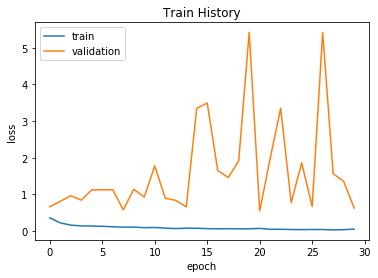

In [23]:
show_train_history(hist_VGG,'loss','val_loss')

C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


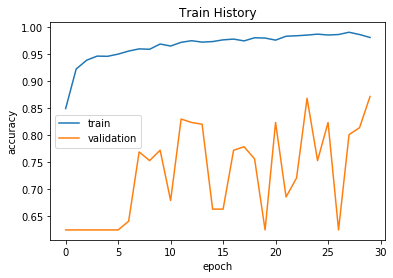

In [24]:
show_train_history(hist_VGG,'accuracy','val_accuracy')

In [25]:
InputShape=(224,224,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=InputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model_cnn = model

In [26]:
model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=["accuracy"])

In [27]:
hist_cnn=model_cnn.fit(X_Train_level1, Y_Train_level1, epochs=30, batch_size=64,
                   class_weight= class_weights,
                   validation_data=(X_val_level1, Y_val_level1),
                   shuffle = 1)
print(model_cnn.evaluate(X_Test_level1, Y_Test_level1, verbose=1))

Train on 5684 samples, validate on 312 samples
Epoch 1/30
5684/5684 [==============================] - 9s 2ms/step - loss: 1.5065 - accuracy: 0.6796 - val_loss: 0.9783 - val_accuracy: 0.6955
Epoch 2/30
5684/5684 [==============================] - 7s 1ms/step - loss: 0.5512 - accuracy: 0.7475 - val_loss: 0.5563 - val_accuracy: 0.7179
Epoch 3/30
5684/5684 [==============================] - 7s 1ms/step - loss: 0.5662 - accuracy: 0.7803 - val_loss: 0.6130 - val_accuracy: 0.7532
Epoch 4/30
4288/5684 [=====================>........] - ETA: 1s - loss: 0.4261 - accuracy: 0.8043

KeyboardInterrupt: 

In [ ]:
print(model_cnn.evaluate(X_Test_level1, Y_Test_level1, verbose=1))

In [ ]:
show_train_history(hist_cnn,'loss','val_loss')

In [ ]:
show_train_history(hist_cnn,'accuracy','val_accuracy')

In [28]:
from tensorflow.python.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,BatchNormalization,Dropout,Conv2D,MaxPool2D

resnet_weights_path = './resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model_res = Sequential()
model_res.add(ResNet50(include_top=False,input_tensor=None,input_shape=(224,224,3),pooling='avg',classes=2,weights=resnet_weights_path))
model_res.add(Flatten())
model_res.add(Dense(512, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(BatchNormalization())
model_res.add(Dense(256, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(BatchNormalization())
model_res.add(Dense(1, activation='sigmoid'))

model_res.layers[0].trainable = False



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model_res.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=["accuracy"])

In [30]:
hist_res=model_res.fit(X_Train_level1, Y_Train_level1, epochs=30, batch_size=64,
                   class_weight= class_weights,
                   validation_data=(X_val_level1, Y_val_level1),
                   shuffle = 1)
print(model_cnn.evaluate(X_Test_level1, Y_Test_level1, verbose=1))

Train on 5684 samples, validate on 312 samples
Epoch 1/30
5684/5684 [==============================] - 13s 2ms/sample - loss: 0.2117 - acc: 0.9154 - val_loss: 0.4608 - val_acc: 0.8365
Epoch 2/30
5684/5684 [==============================] - 10s 2ms/sample - loss: 0.1280 - acc: 0.9507 - val_loss: 0.3989 - val_acc: 0.8301
Epoch 3/30
5684/5684 [==============================] - 11s 2ms/sample - loss: 0.1123 - acc: 0.9569 - val_loss: 0.4280 - val_acc: 0.8397
Epoch 4/30
5684/5684 [==============================] - 11s 2ms/sample - loss: 0.0923 - acc: 0.9611 - val_loss: 0.4050 - val_acc: 0.8397
Epoch 5/30
5684/5684 [==============================] - 10s 2ms/sample - loss: 0.0851 - acc: 0.9680 - val_loss: 0.4399 - val_acc: 0.8173
Epoch 6/30
5684/5684 [==============================] - 10s 2ms/sample - loss: 0.0810 - acc: 0.9713 - val_loss: 0.4268 - val_acc: 0.8526
Epoch 7/30
5684/5684 [==============================] - 11s 2ms/sample - loss: 0.0750 - acc: 0.9701 - val_loss: 0.4767 - val_acc: 0

In [31]:
print(model_res.evaluate(X_Test_level1, Y_Test_level1, verbose=1))

312/312 [==============================] - 1s 4ms/sample - loss: 1.0215 - acc: 0.8173
[1.021487127114923, 0.8173077]


C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


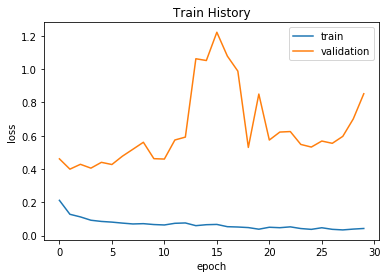

In [32]:
show_train_history(hist_res,'loss','val_loss')

C:\Users\User\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


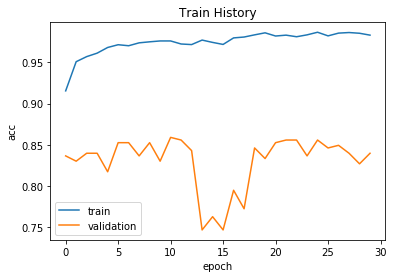

In [35]:
show_train_history(hist_res,'acc','val_acc')

In [36]:
modelVGG1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 112, 112, 32)      688       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 112, 112, 32)      1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128 

In [37]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)       

In [38]:
model_res.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0